In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix 
from time import perf_counter
from time import process_time
import timeit

In [2]:
# loading the dataset to a pandas DataFrame 
df = pd.read_csv('/kaggle/input/creditcard2023/creditcard_2023.csv')
df

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


In [3]:
print(" \nCount total NaN at each column in a DataFrame : \n\n", 
      df.isnull().sum()) 


 
Count total NaN at each column in a DataFrame : 

 id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [4]:
df.drop('id', inplace=True, axis=1)

In [5]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,-1.161847,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,-0.210817,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,-0.144495,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,-0.080078,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


In [6]:
target = 'Class'
X = df.loc[:, df.columns!=target]
Y = df.loc[:, df.columns==target]

Class
0    284315
1    284315
Name: count, dtype: int64


Class
0    227565
1    227339
Name: count, dtype: int64

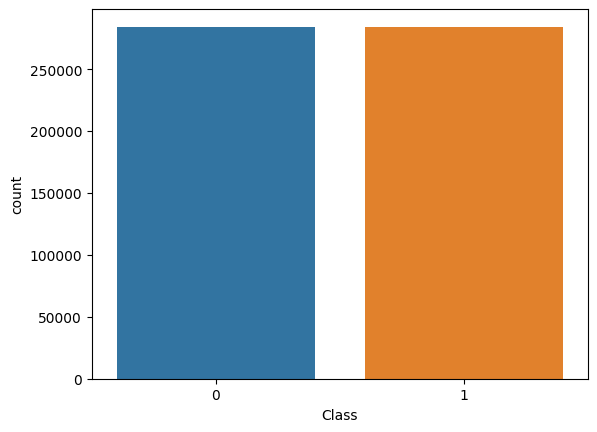

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42)


ax = sns.countplot(x=target, data=df)
print(df[target].value_counts())
Y_train[target].value_counts()

In [8]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
373474,0.312289,0.256749,-0.348959,0.804888,0.196888,-0.139495,-0.081428,-0.240777,-0.788505,-0.243153,...,0.422273,-0.098466,-0.106306,-0.259423,-0.537555,1.191314,0.638648,0.508251,0.867163,10182.15
424048,-0.738924,0.882741,-1.100036,1.183329,-0.584835,-0.626543,-0.632471,0.538635,-0.949273,-0.889646,...,-0.147838,0.322355,0.530422,0.169279,-0.304172,-0.665394,0.207433,-0.132937,-0.949555,12325.14
409855,-0.277764,0.174947,-0.475947,-0.007279,-0.181876,-0.128142,-0.227282,-0.388552,0.184313,-0.556194,...,0.376360,0.462207,-0.214574,-0.080741,-1.018650,0.036501,0.493731,-0.095556,-0.961754,3066.08
90244,-0.195993,-0.470999,2.492314,-0.416324,-0.062093,0.642238,0.213857,-0.122787,1.595950,0.471956,...,-0.353785,-0.096748,0.508039,-0.196086,1.184552,-1.188919,2.114474,-0.591308,0.518468,21745.34
175414,1.786631,-0.574048,-0.251302,-1.011117,1.518896,2.140143,0.282776,0.034446,0.753873,0.638629,...,-0.321018,-0.222583,-0.771246,0.371304,1.509223,-0.507466,0.497143,-0.296853,-0.261746,9666.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,0.801394,-0.816327,0.940860,-1.307453,-0.230994,0.075694,0.244866,-0.139237,1.758674,0.227288,...,0.010923,-0.002396,0.584551,-0.227596,1.335762,0.530426,0.174842,-0.220402,-0.009268,22404.20
259178,-0.094106,-0.396178,0.074629,-1.323275,1.240080,2.411076,0.286226,0.176478,0.752125,0.352242,...,-0.470184,-0.088351,-0.061028,0.224966,1.474007,-2.553339,-1.994806,-0.161470,0.230890,5736.76
365838,-0.986032,-0.241328,-0.805454,0.965279,-0.219016,-1.266523,-1.079518,0.414023,-0.870494,-1.062230,...,-0.139560,0.338603,0.119022,-1.152134,-0.766088,-0.706450,-0.358638,2.010951,0.814228,18943.99
131932,0.136515,-0.130872,1.506084,-0.414279,0.398608,-0.013919,0.872089,-0.239818,0.220758,0.511825,...,-0.155681,-0.082135,0.290838,-0.313113,0.854173,0.306760,-0.967220,-0.372687,-0.575555,6836.59


In [9]:
Y_train

,Class
373474,1
424048,1
409855,1
90244,0
175414,0
...,...
110268,0
259178,0
365838,1
131932,0


Class
0    284315
1    284315
Name: count, dtype: int64


Class
0    227565
1    227339
Name: count, dtype: int64

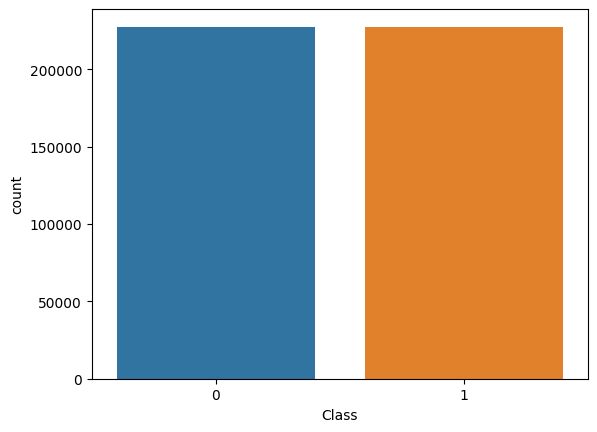

In [10]:
ax = sns.countplot(x=target, data=Y_train)
print(df[target].value_counts())
Y_train[target].value_counts()

In [11]:
X_train.shape
print(Y['Class'].value_counts())

Class
0    284315
1    284315
Name: count, dtype: int64


In [12]:
X_train.shape

(454904, 29)

In [13]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass


def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

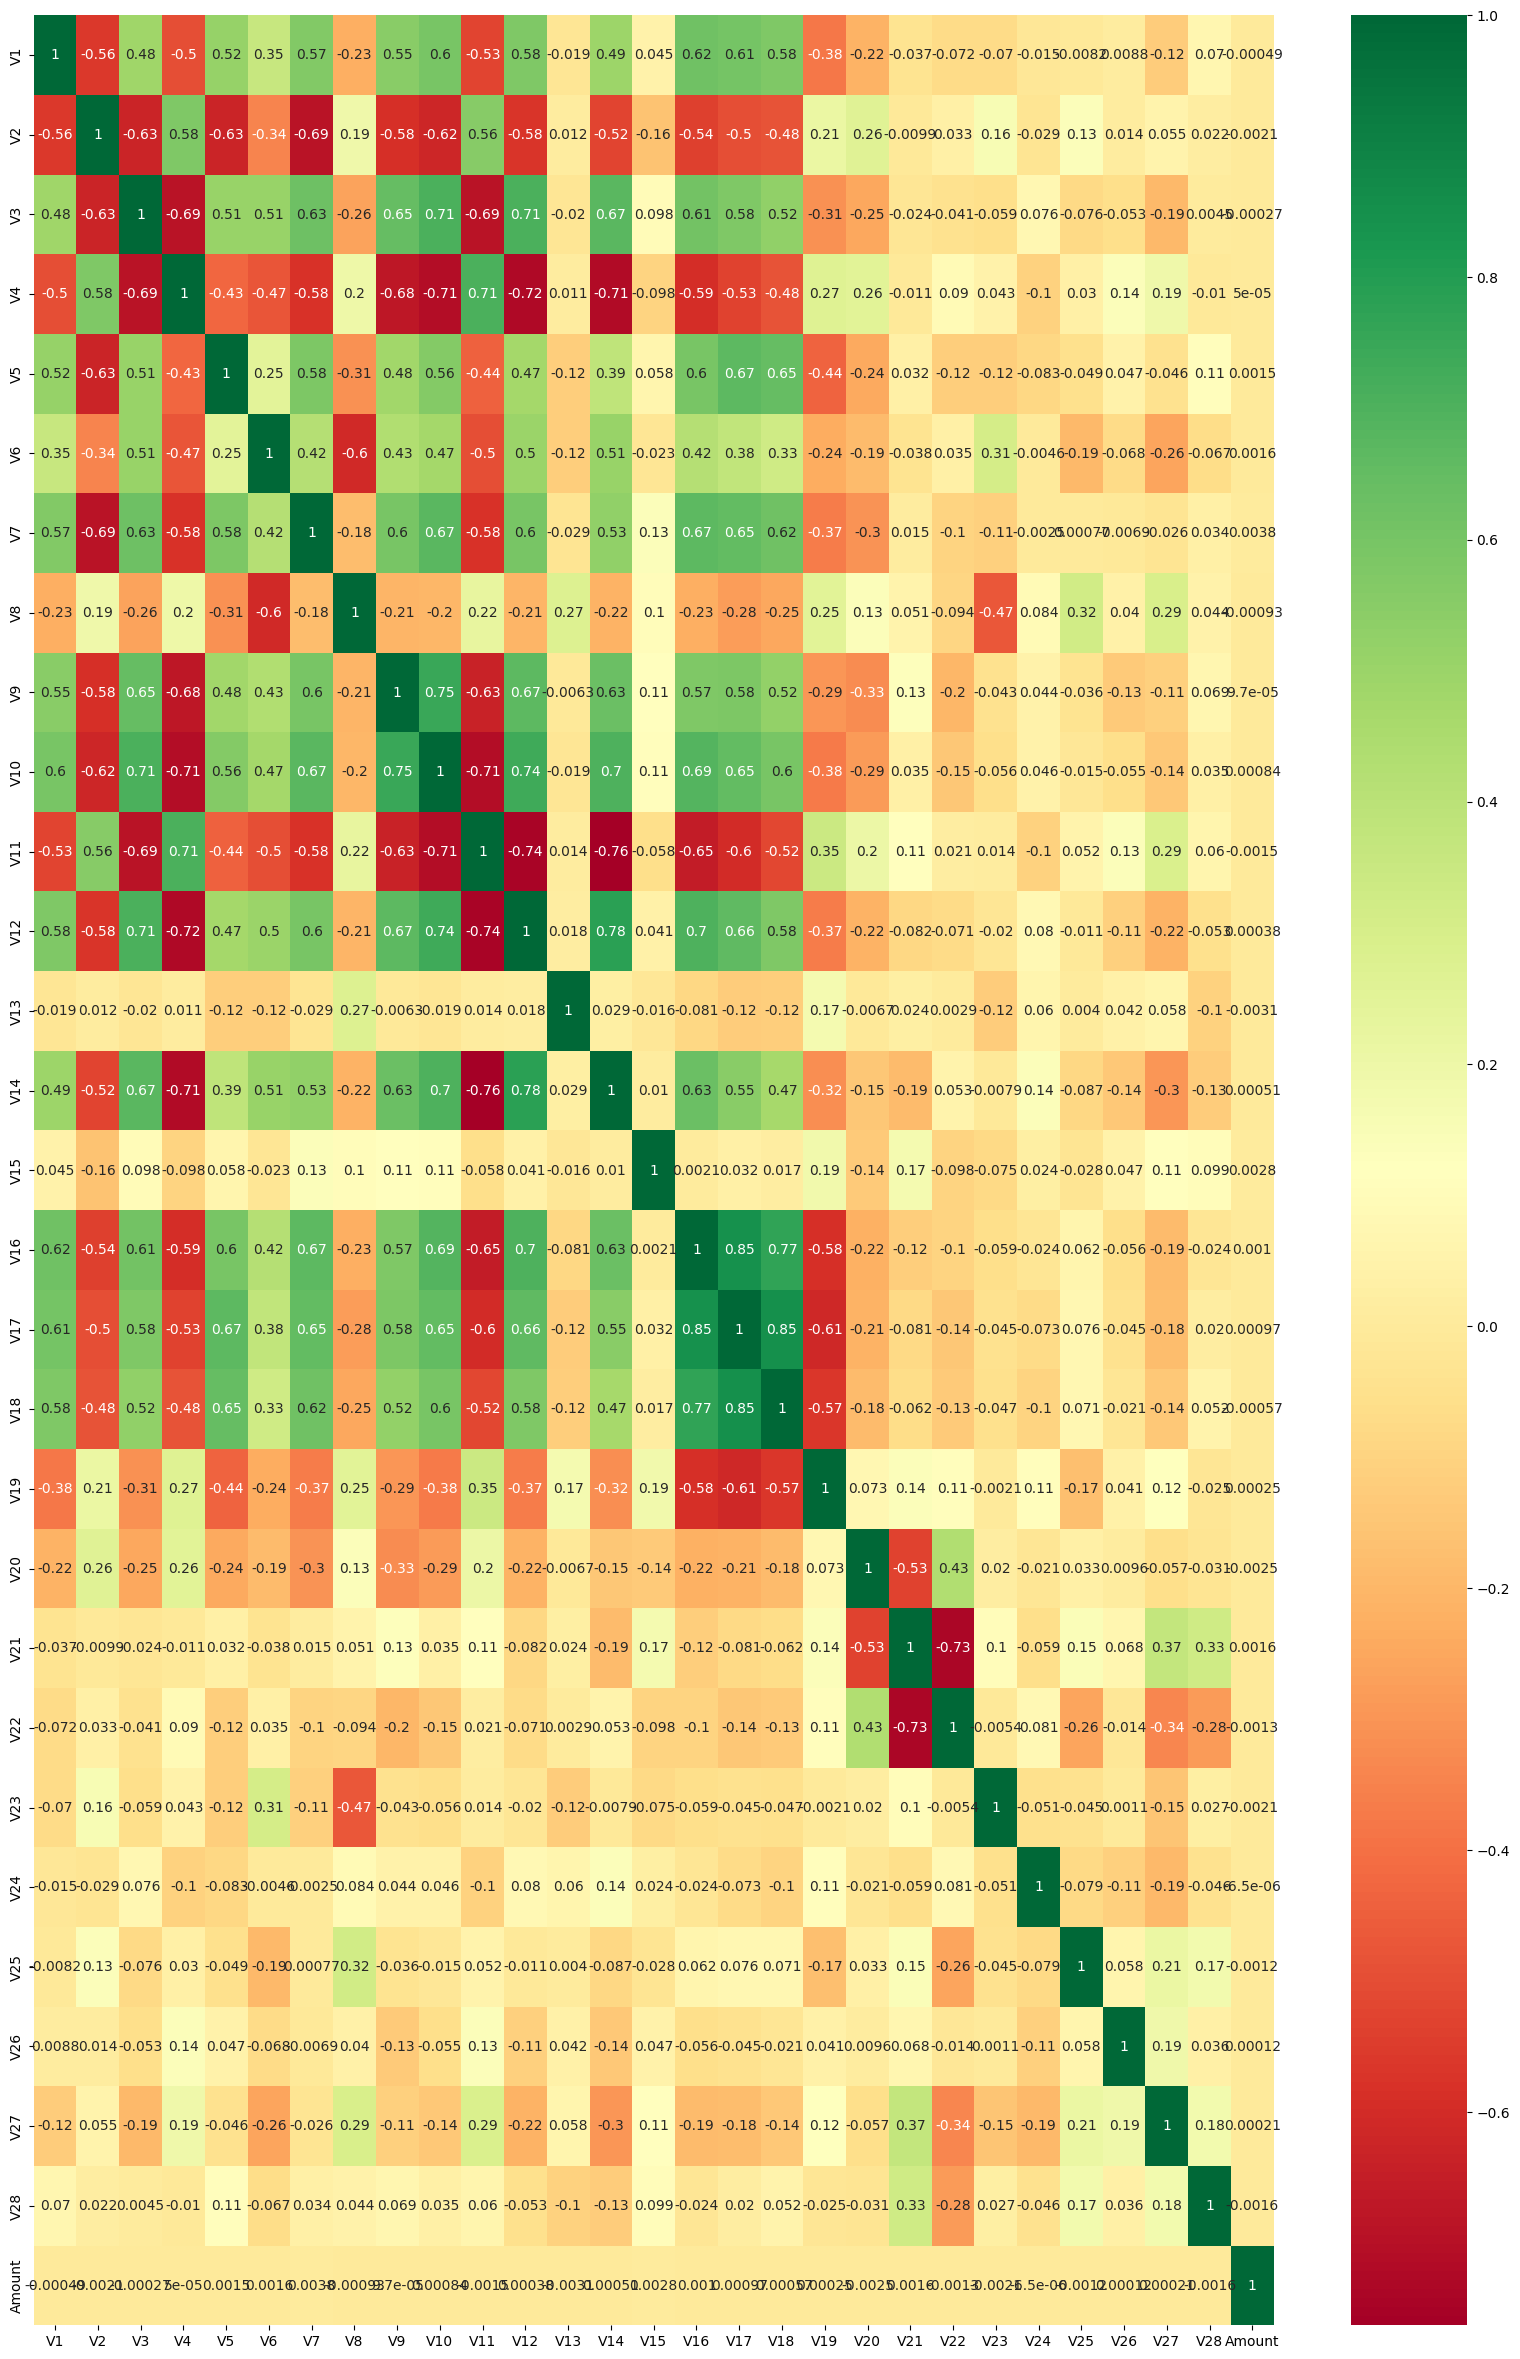

In [14]:
X_train.corr()

import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(20,30))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap="RdYlGn")
plt.show()
def correlation(dataset, threshold):#dataset is X_train , threshold is a value which is may be 80% ,90% ,70%.. 
    col_corr = set()  # Set of all the names of correlated columns
    # using set() so no duplicate column contain here ...
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.95)

In [15]:
len(set(corr_features))

0

In [16]:
#corr_features=['V16']

In [17]:
for col in corr_features:
    for col1 in X_train.columns:
        if col1==col:
            #print(col)
            del X_train[col]
            del X_test[col]
print(X_train)
print(X_test)

              V1        V2        V3        V4        V5        V6        V7  \
373474  0.312289  0.256749 -0.348959  0.804888  0.196888 -0.139495 -0.081428   
424048 -0.738924  0.882741 -1.100036  1.183329 -0.584835 -0.626543 -0.632471   
409855 -0.277764  0.174947 -0.475947 -0.007279 -0.181876 -0.128142 -0.227282   
90244  -0.195993 -0.470999  2.492314 -0.416324 -0.062093  0.642238  0.213857   
175414  1.786631 -0.574048 -0.251302 -1.011117  1.518896  2.140143  0.282776   
...          ...       ...       ...       ...       ...       ...       ...   
110268  0.801394 -0.816327  0.940860 -1.307453 -0.230994  0.075694  0.244866   
259178 -0.094106 -0.396178  0.074629 -1.323275  1.240080  2.411076  0.286226   
365838 -0.986032 -0.241328 -0.805454  0.965279 -0.219016 -1.266523 -1.079518   
131932  0.136515 -0.130872  1.506084 -0.414279  0.398608 -0.013919  0.872089   
121958  1.019421 -0.730265  0.678630 -0.993771 -0.089968  0.096643  0.275693   

              V8        V9       V10  .

In [18]:
#X_train=X

In [19]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
373474,0.312289,0.256749,-0.348959,0.804888,0.196888,-0.139495,-0.081428,-0.240777,-0.788505,-0.243153,...,0.422273,-0.098466,-0.106306,-0.259423,-0.537555,1.191314,0.638648,0.508251,0.867163,10182.15
424048,-0.738924,0.882741,-1.100036,1.183329,-0.584835,-0.626543,-0.632471,0.538635,-0.949273,-0.889646,...,-0.147838,0.322355,0.530422,0.169279,-0.304172,-0.665394,0.207433,-0.132937,-0.949555,12325.14
409855,-0.277764,0.174947,-0.475947,-0.007279,-0.181876,-0.128142,-0.227282,-0.388552,0.184313,-0.556194,...,0.376360,0.462207,-0.214574,-0.080741,-1.018650,0.036501,0.493731,-0.095556,-0.961754,3066.08
90244,-0.195993,-0.470999,2.492314,-0.416324,-0.062093,0.642238,0.213857,-0.122787,1.595950,0.471956,...,-0.353785,-0.096748,0.508039,-0.196086,1.184552,-1.188919,2.114474,-0.591308,0.518468,21745.34
175414,1.786631,-0.574048,-0.251302,-1.011117,1.518896,2.140143,0.282776,0.034446,0.753873,0.638629,...,-0.321018,-0.222583,-0.771246,0.371304,1.509223,-0.507466,0.497143,-0.296853,-0.261746,9666.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,0.801394,-0.816327,0.940860,-1.307453,-0.230994,0.075694,0.244866,-0.139237,1.758674,0.227288,...,0.010923,-0.002396,0.584551,-0.227596,1.335762,0.530426,0.174842,-0.220402,-0.009268,22404.20
259178,-0.094106,-0.396178,0.074629,-1.323275,1.240080,2.411076,0.286226,0.176478,0.752125,0.352242,...,-0.470184,-0.088351,-0.061028,0.224966,1.474007,-2.553339,-1.994806,-0.161470,0.230890,5736.76
365838,-0.986032,-0.241328,-0.805454,0.965279,-0.219016,-1.266523,-1.079518,0.414023,-0.870494,-1.062230,...,-0.139560,0.338603,0.119022,-1.152134,-0.766088,-0.706450,-0.358638,2.010951,0.814228,18943.99
131932,0.136515,-0.130872,1.506084,-0.414279,0.398608,-0.013919,0.872089,-0.239818,0.220758,0.511825,...,-0.155681,-0.082135,0.290838,-0.313113,0.854173,0.306760,-0.967220,-0.372687,-0.575555,6836.59


In [20]:
X=X_train

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=4, 
                             random_state=2018,
                             criterion='gini',
                             n_estimators=100,
                             verbose=False)
rf.fit(X_train, Y_train)

/tmp/ipykernel_237/1162601971.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


KeyboardInterrupt: 

In [ ]:
rf.feature_importances_

In [ ]:
#creating a table for checking the importance of different variables  
feat_imp=pd.DataFrame({"Features":X_train.columns,"Importance":rf.feature_importances_}).sort_values(by="Importance",ascending=False)


In [ ]:
feat_imp

In [ ]:
## visualizing the importance of variables
plt.figure(figsize=(12,6))
sns.barplot(data=feat_imp,x="Features",y="Importance")
plt.show()

In [ ]:
#filtering out the variables having more than 1% impact on the model
feat_imp[feat_imp["Importance"]>0.0105]["Features"].unique()

# Information Gain

In [ ]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, Y_train)
mutual_info

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

In [ ]:
#creating a table for checking the importance of different variables  
info_gain=pd.DataFrame({"Features":X_train.columns,"Info_gain":mutual_info}).sort_values(by="Info_gain",ascending=False)


In [ ]:
info_gain

In [ ]:
## visualizing the importance of variables
plt.figure(figsize=(12,6))
sns.barplot(data=info_gain,x="Features",y="Info_gain")
plt.show()

In [ ]:
#filtering out the variables having more than 1% impact on the model
info_gain[info_gain["Info_gain"]>0.183]["Features"].unique()

In [22]:
## selecting the important variabels
X_train=X_train[['V14', 'V17', 'V10', 'V12', 'V4', 'V11', 'V3', 'V16', 'V7', 'V2','V9', 'V21', 'V27', 'V18', 'V1']]          

X_test=X_test[['V14', 'V17', 'V10', 'V12', 'V4', 'V11', 'V3', 'V16', 'V7', 'V2','V9', 'V21', 'V27', 'V18', 'V1']]               



In [23]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
X_train = pd.DataFrame(min_max.fit_transform(X_train), columns=X_train.columns)
X_train

,V14,V17,V10,V12,V4,V11,V3,V16,V7,V2,V9,V21,V27,V18,V1
0,0.065784,0.223375,0.083705,0.072120,0.708263,0.772224,0.163771,0.039271,0.019217,0.924439,0.123363,0.702014,0.088959,0.252251,0.665174
1,0.046609,0.172996,0.065173,0.041353,0.754829,0.831219,0.120380,0.025496,0.016737,0.935961,0.116670,0.717334,0.083777,0.203309,0.481544
2,0.043563,0.161771,0.074731,0.052425,0.608330,0.811083,0.156434,0.025759,0.018560,0.922933,0.163860,0.722425,0.084079,0.167472,0.562101
3,0.104843,0.334162,0.104203,0.164535,0.557999,0.510443,0.327915,0.046277,0.020545,0.911044,0.222624,0.702077,0.080072,0.271825,0.576385
4,0.146511,0.296778,0.108981,0.146608,0.484812,0.631846,0.169412,0.052823,0.020856,0.909147,0.187570,0.697496,0.082452,0.240663,0.922717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454899,0.133664,0.300912,0.097190,0.195777,0.448349,0.711537,0.238285,0.051918,0.020685,0.904687,0.229398,0.705512,0.083070,0.354904,0.750612
454900,0.142936,0.293989,0.100772,0.144816,0.446403,0.598106,0.188242,0.055578,0.020871,0.912421,0.187497,0.702383,0.083546,0.293054,0.594183
454901,0.038075,0.099730,0.060226,0.036720,0.727999,0.871926,0.137398,0.015552,0.014725,0.915271,0.119950,0.717925,0.101104,0.117375,0.438378
454902,0.131534,0.291763,0.105346,0.132992,0.558250,0.601450,0.270939,0.053124,0.023507,0.917304,0.165377,0.702609,0.081839,0.292698,0.634469


In [24]:
X_test = pd.DataFrame(
    min_max.transform(X_test),
    columns = X_test.columns
)

# Hyperparameter for XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define the hyperparameter distributions
param_dist = {
    'learning_rate': uniform(0.01, 0.3),
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 10),
    'min_child_weight': randint(1, 10),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'gamma': uniform(0, 0.5),
    'reg_lambda': uniform(0, 100),
    'reg_alpha': uniform(0, 10),
}

# Instantiate the classifier
xgb_classifier = XGBClassifier()

# Instantiate the RandomizedSearchCV object
random_search = RandomizedSearchCV(xgb_classifier, param_distributions=param_dist, n_iter=100, cv=5, scoring='f1', random_state=42)

# Fit the model
random_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)


In [ ]:
#Best Hyperparameters: {'colsample_bytree': 0.9747603118288211, 'gamma': 0.07353674046451897, 'learning_rate': 0.28797628754844834, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 607, 'reg_alpha': 0.6623597785186586, 'reg_lambda': 4.586126640463295, 'subsample': 0.8104028422110456}
GS.fit(X_train, Y_train)

In [ ]:
print('Best Parameters:',GS.best_params_,end='\n\n')
print('Best Score:',GS.best_score_)

Elapsed time :  19.456929040000432
Accuracy on Training data : ,  0.9999934052019767
Accuracy score on Test data XGBost: 0.9997098288869739
Accuracy =  0.9997098288869739
Precision =  0.99942114402989
Recall =  1.0
F1 Score =  0.9997104882221345
[[56717     0]
 [   33 56976]]


<Axes: >

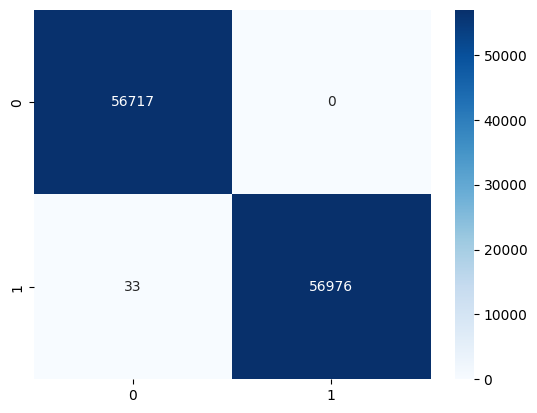

In [25]:
from xgboost import XGBClassifier
#n_estimators= 12, max_depth=7, learning_rate=0.2
model = XGBClassifier(colsample_bytree= 0.9747603118288211, gamma= 0.07353674046451897, learning_rate=0.28797628754844834, max_depth= 5, min_child_weight= 1, n_estimators=600, reg_alpha=0.6623597785186586, reg_lambda=4.586126640463295, subsample=0.8104028422110456)
start_time = timeit.default_timer()
model.fit(X_train, Y_train)
end_time = timeit.default_timer()
elapsed_time = end_time - start_time

print("Elapsed time : ",elapsed_time)

#Accuracy on training data  
x_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(x_train_prediction , Y_train)
print('Accuracy on Training data : , ', training_data_accuracy)

# accuracy on test data 
x_test_prediction = model.predict(X_test)
test_data_accuracy=accuracy_score(x_test_prediction,Y_test)
print('Accuracy score on Test data XGBost:' ,test_data_accuracy)
generate_model_report(Y_test, x_test_prediction)

confusion_matrix(x_test_prediction,Y_test)
cf_matrix=confusion_matrix(x_test_prediction,Y_test)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt='g')

/tmp/ipykernel_237/2055144450.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


Elapsed time :  150.4422776750007
Accuracy on Training data : ,  1.0
Accuracy score on Test data RF : 0.9998505179114714
Accuracy =  0.9998505179114714
Precision =  0.9997192539172852
Recall =  0.999982448750351
F1 Score =  0.9998508340133547
[[56734     1]
 [   16 56975]]


<Axes: >

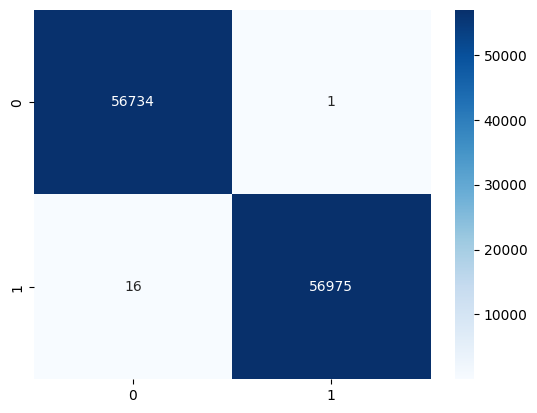

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=4,random_state=2010,criterion='entropy',n_estimators=150,verbose=False)
start_time = timeit.default_timer()
rf.fit(X_train, Y_train)

end_time = timeit.default_timer()
elapsed_time = end_time - start_time

print("Elapsed time : ",elapsed_time)

x_train_prediction = rf.predict(X_train)
training_data_accuracy = accuracy_score(x_train_prediction , Y_train)
print('Accuracy on Training data : , ', training_data_accuracy)

# accuracy on test data 
x_test_prediction = rf.predict(X_test)
test_data_accuracy=accuracy_score(x_test_prediction,Y_test)
print('Accuracy score on Test data RF :' ,test_data_accuracy)

generate_model_report(Y_test, x_test_prediction)
#print(confusion_matrix(x_test_prediction,Y_test))
confusion_matrix(x_test_prediction,Y_test)
cf_matrix=confusion_matrix(x_test_prediction,Y_test)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt='g')

# Extra Tree Hyperparameter Tune

In [ ]:
model = ExtraTreesClassifier()

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Define the evaluation metric
scoring = 'f1'

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=5, verbose=1, n_jobs=-1)
grid_result = grid_search.fit(X_train, Y_train)

# Get the best model
best_model = grid_result.best_estimator_

# Evaluate the best model on the test set
test_accuracy = best_model.score(X_test, Y_test)
print("Test Accuracy:", test_accuracy)

# Get the best hyperparameters
best_params = grid_result.best_params_
print("Best Hyperparameters:", best_params)

In [ ]:
'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]

# ExtraTree

/tmp/ipykernel_237/3594937108.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_et.fit(X_train, Y_train)


Elapsed time :  85.67930076700031
Accuracy on Training data : ,  1.0
Accuracy score on Test data XGBost: 0.9998944832316269
Accuracy =  0.9998944832316269
Precision =  0.9997894293535481
Recall =  1.0
F1 Score =  0.9998947035906075
[[56738     0]
 [   12 56976]]


<Axes: >

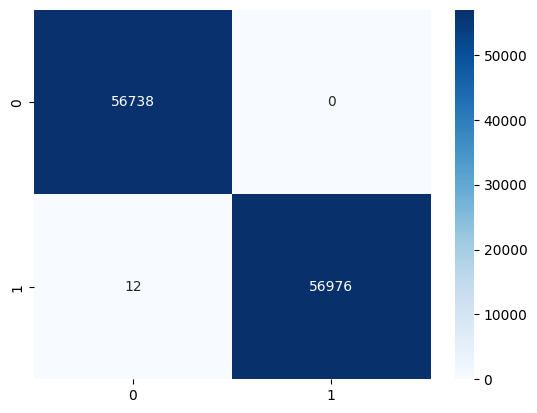

In [27]:
from sklearn.ensemble import ExtraTreesClassifier
model_et = ExtraTreesClassifier(bootstrap= False, max_depth=None, min_samples_leaf= 1, min_samples_split=2, n_estimators=120)
start_time = timeit.default_timer()
model_et.fit(X_train, Y_train)
end_time = timeit.default_timer()
elapsed_time = end_time - start_time

print("Elapsed time : ",elapsed_time)

#Accuracy on training data  
x_train_prediction = model_et.predict(X_train)
training_data_accuracy = accuracy_score(x_train_prediction , Y_train)
print('Accuracy on Training data : , ', training_data_accuracy)

# accuracy on test data 
x_test_prediction = model_et.predict(X_test)
test_data_accuracy=accuracy_score(x_test_prediction,Y_test)
print('Accuracy score on Test data XGBost:' ,test_data_accuracy)
generate_model_report(Y_test, x_test_prediction)

confusion_matrix(x_test_prediction,Y_test)
cf_matrix=confusion_matrix(x_test_prediction,Y_test)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt='g')

# ROC-AUC curve

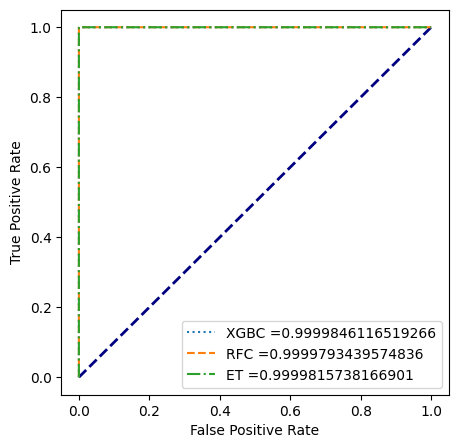

In [28]:
    y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]
    fpr_rf, tpr_rf, thresholds = roc_curve(Y_test,  y_pred_proba_rf)
    auc_rf = roc_auc_score(Y_test, y_pred_proba_rf)
    
    y_pred_proba_xb = model.predict_proba(X_test)[:, 1]
    fpr_xb, tpr_xb, thresholds = roc_curve(Y_test,  y_pred_proba_xb)
    auc_xb = roc_auc_score(Y_test, y_pred_proba_xb)
    
    y_pred_proba_et = model_et.predict_proba(X_test)[:, 1]
    fpr_et, tpr_et, thresholds = roc_curve(Y_test,  y_pred_proba_et)
    auc_et = roc_auc_score(Y_test, y_pred_proba_et)
    
    
    
    plt.figure(figsize=(5, 5), dpi=100)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    
    plt.plot(fpr_xb,tpr_xb,linestyle='dotted',label="XGBC ="+str(auc_xb))
    plt.plot(fpr_rf,tpr_rf,linestyle='dashed',label="RFC ="+str(auc_rf))
    plt.plot(fpr_et,tpr_et,linestyle='dashdot',label="ET ="+str(auc_et))
    plt.legend(loc=4)
    plt.show()

# Precision Recall Curve

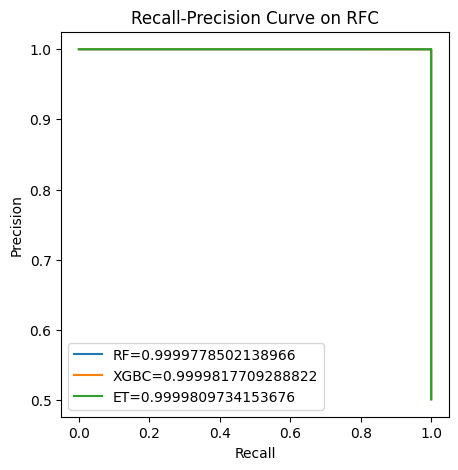

In [29]:
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
#print('Logistic PR-AUC: %.3f'% auc_score)
y_test_prob_rf=rf.predict_proba(X_test)[:,1]
precision_rf, recall_rf,_ =precision_recall_curve(Y_test, y_test_prob_rf)
auc_score_rf=metrics.auc(recall_rf, precision_rf)
y_test_prob_xb=model.predict_proba(X_test)[:,1]
precision_xb, recall_xb,_ =precision_recall_curve(Y_test, y_test_prob_xb)
auc_score_xb=metrics.auc(recall_xb, precision_xb)
y_test_prob_et=model_et.predict_proba(X_test)[:,1]
precision_et, recall_et,_ =precision_recall_curve(Y_test, y_test_prob_et)
auc_score_et=metrics.auc(recall_et, precision_et)

plt.figure(figsize=(5,5))
#label='ROC curve (area = %0.2f)' % roc_auc
plt.plot(recall_rf, precision_rf, marker='',label="RF="+str(auc_score_rf))
plt.plot(recall_xb, precision_xb, marker='',label="XGBC="+str(auc_score_xb))
plt.plot(recall_et, precision_et, marker='',label="ET="+str(auc_score_et))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Recall-Precision Curve on RFC")
plt.legend()
plt.show()

# Ensemble:Voting

In [30]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier 


random_forest_clf = rf = RandomForestClassifier(n_jobs=4,random_state=2010,criterion='entropy',n_estimators=150,verbose=False)

extra_trees_clf = ExtraTreesClassifier(bootstrap= False, max_depth=None, min_samples_leaf= 1, min_samples_split=2, n_estimators=120)

model = XGBClassifier(colsample_bytree= 0.9747603118288211, gamma= 0.07353674046451897, learning_rate=0.28797628754844834, max_depth= 5, min_child_weight= 1, n_estimators=600, reg_alpha=0.6623597785186586, reg_lambda=4.586126640463295, subsample=0.8104028422110456)

estimators = [random_forest_clf,extra_trees_clf,model]
for estimator in estimators:
    start_time = perf_counter()
    estimator.fit(X_train, Y_train)
    end_time = perf_counter()
    elapsed_time = end_time - start_time

    print("Elapsed time : ",elapsed_time)

/tmp/ipykernel_237/203637190.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, Y_train)


Elapsed time :  150.57905474699965


/tmp/ipykernel_237/203637190.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, Y_train)


Elapsed time :  82.97580918599942
Elapsed time :  16.488956328999848


In [31]:
[estimator.score(X_test, Y_test) for estimator in estimators]

[0.9998505179114714, 0.9998944832316269, 0.9997098288869739]

In [32]:
from sklearn.ensemble import VotingClassifier

named_estimators = [ ("random_forest_clf", random_forest_clf),("extra tree ",extra_trees_clf),("xgbc",model)] #,("lr_clf",lr_clf),("knn_clf",knn_clf),("kb_clf",kb_clf)

In [33]:
voting_clf = VotingClassifier(named_estimators,voting ='hard')

In [34]:
start_time =timeit.default_timer()
voting_clf.fit(X_train, Y_train)
end_time = timeit.default_timer()
elapsed_time = end_time - start_time
print('elapsed time',elapsed_time)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


elapsed time 251.6771844449995


In [35]:
x_test_prediction=voting_clf.predict(X_test)
x_train_prediction = voting_clf.predict(X_train)


In [36]:
training_data_accuracy = accuracy_score(x_test_prediction , Y_test)
test_data_accuracy=accuracy_score(x_test_prediction,Y_test)
print('Accuracy score on Test data :' ,test_data_accuracy)

Accuracy score on Test data : 0.9998681040395336


Accuracy =  0.9998681040395336
Precision =  0.9997368005474548
Recall =  1.0
F1 Score =  0.99986838295296
None
[[56735     0]
 [   15 56976]]


<Axes: >

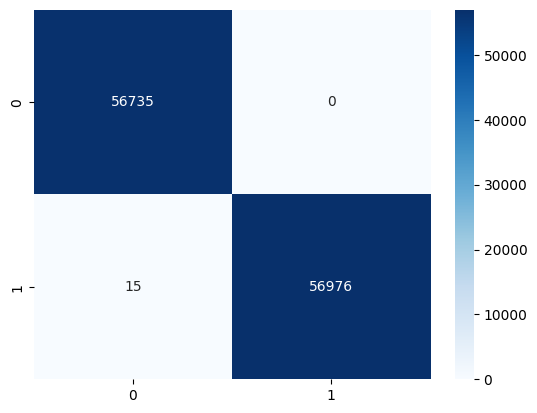

In [37]:
print(generate_model_report(Y_test, x_test_prediction))
print(confusion_matrix( x_test_prediction,Y_test))
cf_matrix=confusion_matrix(x_test_prediction,Y_test)
#print(cf_matrix)
sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt='g')

# ROC AUC Curve for Ensemble: voting

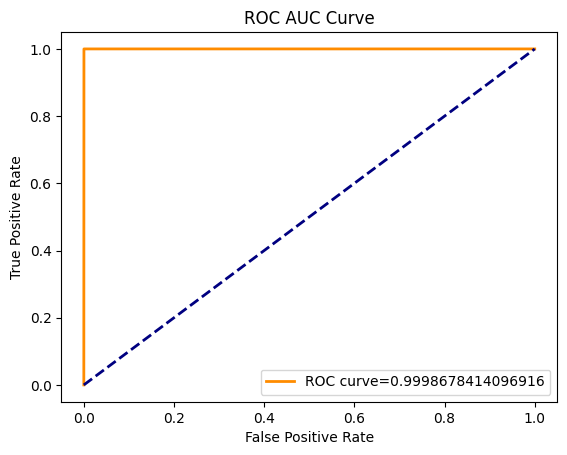

In [38]:
from sklearn.metrics import roc_curve, auc

y_pred = voting_clf.predict(X_test)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)

# Compute ROC AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label="ROC curve="  +str(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()

# PR Curve for Ensemble : voting

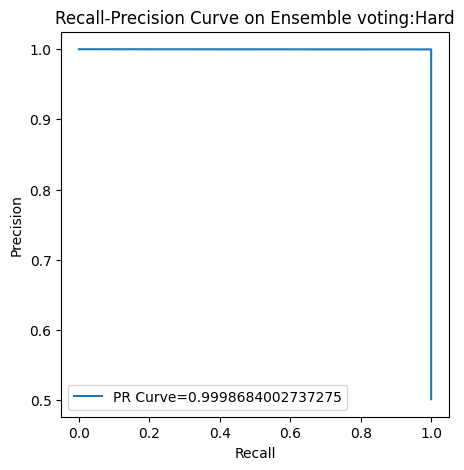

In [39]:
from sklearn.metrics import precision_recall_curve
from sklearn import metrics

y_pred = voting_clf.predict(X_test)

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(Y_test, y_pred)
auc_score_rf=metrics.auc(recall, precision)



plt.figure(figsize=(5,5))
plt.plot(recall, precision, marker='',label="PR Curve="+str(auc_score_rf))

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Recall-Precision Curve on Ensemble voting:Hard")
plt.legend()
plt.show()



